# Modeling an autoregressive (AR) process
In a moving average (MA) process, **the present value is linearly dependent on current and past error terms**. Therefore, if we predict `more than q steps ahead`, the prediction will fall flat and will return only the mean of the series because the `error terms are not observed` in the data and must be recursively estimated.

$y_t = μ + ϵ_t + θ_1 ϵ_{t−1} + θ_2 ϵ_{t−2} + ⋅⋅⋅ + θ_q ϵ_{t−q}$

We can determine the order of a stationary MA(q) process by studying the ACF plot; the autocorrelation coefficients will be significant up until lag `q`. In the case where the autocorrelation coefficients slowly decay or exhibit a `sinusoidal pattern`, then we are possibly in the presence of an `autoregressive (AR) process`.

## Defining an AR process
An AR process establishes that **the output variable depends linearly on its own previous values**. In other words, it is a regression of the variable against itself.

An AR process is denoted as an AR(p) process, where p is the order. In such process, the present value $y_t$ is a linear combination of a constant $C$, the present error term $ϵ_t$, and the past values of the series $y_{t−p}$. The magnitude of the influence of the past values on the present value is denoted as $ϕ_p$, which represent the coefficients of the AR(p) model. Mathematically, we express a general AR(p) model as:

$y_t = C + (ϕ_1 y_{t-1} + ϵ_t ) + (ϕ_2 y_{t-2} + ϵ_t ) + ⋅⋅⋅ + (ϕ_p y_{t-p} + ϵ_t )$

## Finding the order of a stationary AR process
<!-- ![Steps to identify an AR(p) model and its order](C:/Users/JK/Downloads/AR_process.png) -->


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('foot_traffic.csv')
df.head()

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695


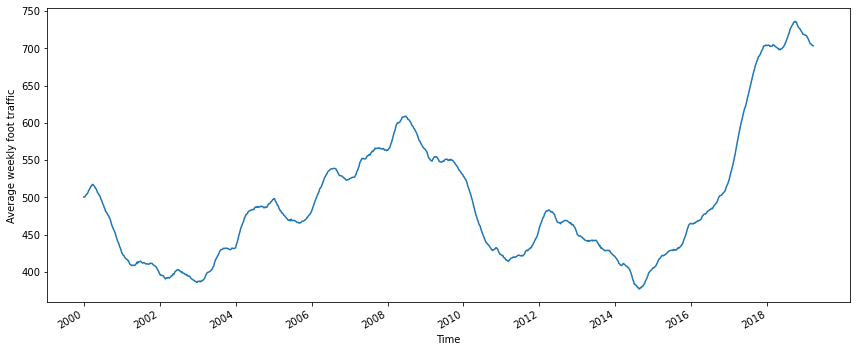

In [2]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(df.foot_traffic)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')
plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [3]:
## Test for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0])) # Retrieve the ADF statistic
    print('p - value: {}'.format(result[1]))      # Retrieve the p-value
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    return result

DF_result = adf_test(df.foot_traffic) 

ADF Statistics: -1.1758885999240836
p - value: 0.6838808917896152
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


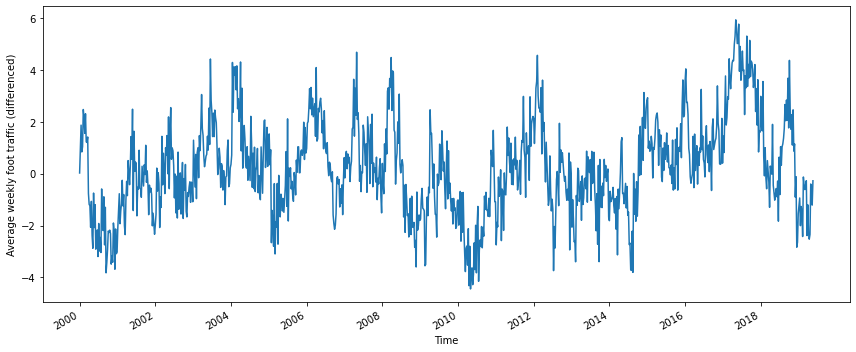

In [11]:
## Apply transformation - First difference ## To remove the effect of the trend and stabilize the mean of the series, we will use differencing.

foot_traffic_diff = np.diff(df.foot_traffic, n=1) ## (999,1)

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(foot_traffic_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic (differenced)')
plt.xticks(np.arange(0, 999, 103), np.arange(2000, 2020, 2))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [12]:

DF_result = adf_test(foot_traffic_diff) 

## Now series is STATIONARY

ADF Statistics: -5.268231347422037
p - value: 6.3693176547815e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


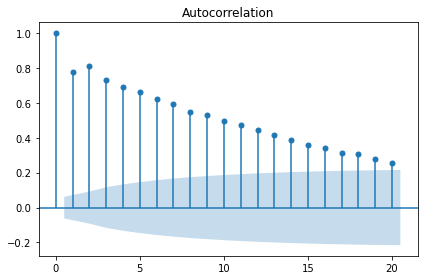

In [13]:
from statsmodels.graphics.tsaplots import plot_acf 

plot_acf(foot_traffic_diff, lags=20)
plt.tight_layout()

## Notice that the plot is slowly decaying. The coefficients are slowly decaying as the lag increases.
## Therefore, there is not lag at which the coefficients abruptly become non-significant. This means that we do not have a MA process.
## It is indicative of an AR process.

## The partial autocorrelation function (PACF)
We must then find a way to identify the order p of our AR(p) process. Specifically, we must turn our attention to the `PACF` plot.

Partial autocorrelation measures the `correlation between lagged values in a time series when we remove the influence of other correlated lagged values`. We can plot the partial autocorrelation function to determine the order of
a stationary AR(p) process. The coefficients will be non-significant after lag p.

## Example:

$y_t = 0.33y_{t−1} + 0.50y_{t−2}$

Since by the nature of an AR(2) process, each value depends on the previous two values. when we measure the autocorrelation between $y_t$ and $y_{t−1}$ using the ACF, we are not taking into account the fact that $y_{t−2}$ also has an influence on bothyt and $y_{t−1}$. This means that we are not measuring the true impact of $y_{t−1}$ on yt. To do so, we must remove the effect of $y_{t−2}$. That way, we are effectively measuring the real association
between $y_t$ and $y_{t−1}$. Thus, we are measuring the `partial autocorrelation` between $y_t$ and $y_{t−1}$.

In [14]:
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(42)
ma2         = np.array([1, 0, 0])         # Set the coefficients of the MA(q) process to 0, since we are only interested in simulating an AR(2) process.
ar2         = np.array([1, -0.33, -0.50]) # the function requires the coefficient at lag 0, which is the number that multiplies yt. Here, that number is 1.
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000) # Simulate the AR(2) process and generate 1000 samples.

**Plot the PACF and see if the coefficients become abruptly non-significant after lag 2. If that is the case, then we can use the PACF plot to determine the order of a stationary AR process**

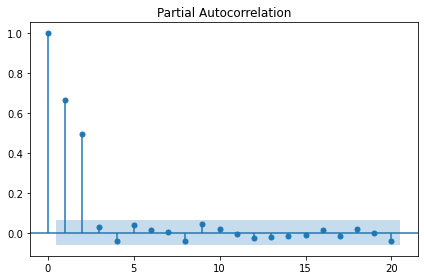

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(AR2_process, lags=20)
plt.tight_layout()
plt.show()

# After lag 2, the partial autocorrelation coefficients are not significantly different from 0. So p = 2

## Apply same strategy with foot_traffic dataset

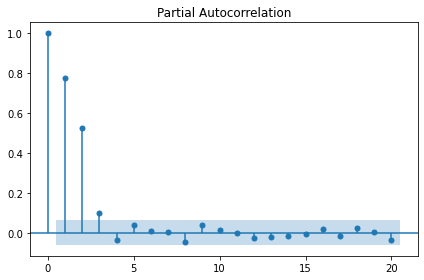

In [16]:
plot_pacf(foot_traffic_diff, lags=20)
plt.tight_layout()
plt.show()

# The coefficients are non-significant after lag 3. Therefore, we can say that our stationary process is a third-order autoregressive process or an AR(3) process.

## Forecasting an AR process
We will perform rolling forecasts over our test set. Remember that our data was recorded over a weekly period, so predicting the next timestep is forecasting next week’s average foot traffic. We will forecast using three different methods:
1. the historical mean method
2. the last known value method (will act as baselines), and
3. an AR(3) model

We will use the mMSE to evaluate the performance of each forecasting method.

In [17]:
df_diff = pd.DataFrame({'foot_traffic_diff': foot_traffic_diff})
train   = df_diff[:-52]
test    = df_diff[-52:]
print(len(train))
print(len(test))

947
52


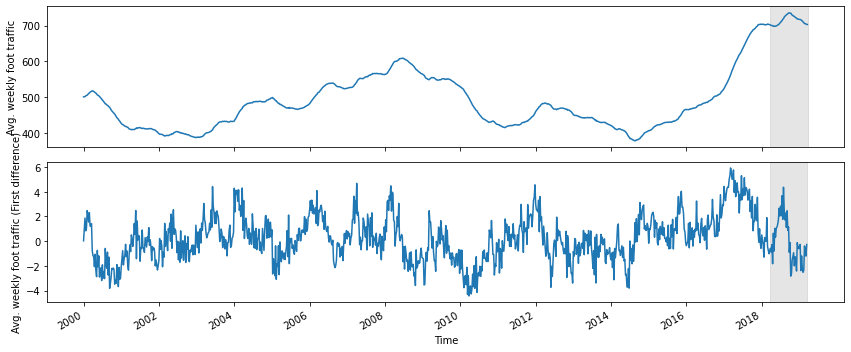

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,5))
ax1.plot(df.foot_traffic)           # (1000,1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg. weekly foot traffic')
ax1.axvspan(948, 1000, color='#808080', alpha=0.2)
ax2.plot(df_diff.foot_traffic_diff) # (999,1)
ax2.set_xlabel('Time')
ax2.set_ylabel('Avg. weekly foot traffic (First difference)')
ax2.axvspan(947, 999, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))
fig.autofmt_xdate()
plt.tight_layout()

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    '''
    The function takes in a DataFrame containing the full simulated AR process. We also pass in the length of the training set and the horizon of forecast.
    window specifies how many steps at time we wish to forecast (3 in our case). Finally, we specify the method to use to make forecasts. 
    '''
    total_len = train_len + horizon 
 
    if method == 'mean': ## forecasts coming from the historical mean
        pred_mean = [] 
 
        for i in range(train_len, total_len, window): 
            mean = np.mean(df[:i].values) 
            pred_mean.extend(mean for _ in range(window)) 
        return pred_mean 
    
    elif method == 'last': ## forecasts coming from the last observed value
        pred_last_value = [] 
 
        for i in range(train_len, total_len, window): 
            last_value = df[:i].iloc[-1].values[0] 
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value 
 
    elif method == 'AR': ## forecasts coming from the AR(q), predicting beyond q steps
        pred_AR = [] 
 
        for i in range(train_len, total_len, window): 
            model       = SARIMAX(df[:i], order=(3,0,0)) ## p, w, q
            res         = model.fit(disp=False) 
            predictions = res.get_prediction(0, i + window - 1) 
            oos_pred    = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred) 
    return pred_AR

In [20]:
pred_df         = test.copy()
TRAIN_LEN       = len(train)
HORIZON         = len(test)
WINDOW          = 1 # to predict only the next timestep
pred_mean       = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR         = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')

pred_df['pred_mean']       = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_AR']         = pred_AR
pred_df.head()

,foot_traffic_diff,pred_mean,pred_last_value,pred_AR
947,-0.776601,0.213270,-1.021893,-0.719714
948,-0.574631,0.212226,-0.776601,-0.814547
949,-0.890697,0.211397,-0.574631,-0.664738
950,-0.283552,0.210237,-0.890697,-0.641469
951,-1.830685,0.209717,-0.283552,-0.579279


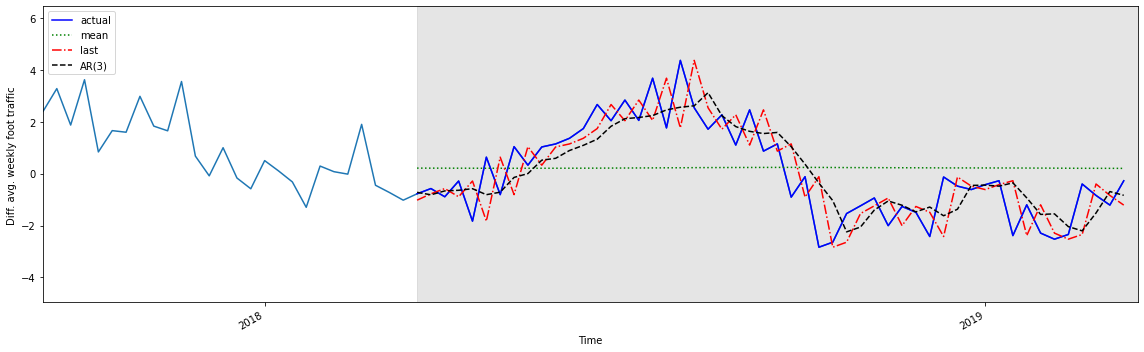

In [21]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(df_diff.foot_traffic_diff) # (999,1) - Plot part of the training set, so we can see the transition from the training set to the test set.
ax.plot(pred_df.foot_traffic_diff, 'b-', label='actual') # (52,)
ax.plot(pred_df.pred_mean, 'g:', label='mean') # (52,) predictions from the historical mean method
ax.plot(pred_df.pred_last_value, 'r-.', label='last') # (52,) predictions from the last known value method
ax.plot(pred_df.pred_AR, 'k--', label='AR(3)') # (52,) predictions from the AR(3) model
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Diff. avg. weekly foot traffic')
ax.axvspan(947, 999, color='#808080', alpha=0.2)
ax.set_xlim(920, 999)
plt.xticks([936, 988],[2018, 2019])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## Performance

In [26]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df.foot_traffic_diff, pred_df.pred_mean)
mse_last = mean_squared_error(pred_df.foot_traffic_diff, pred_df.pred_last_value)
mse_AR = mean_squared_error(pred_df.foot_traffic_diff, pred_df.pred_AR)
print(mse_mean, mse_last, mse_AR)

3.1079979374701545 1.4487301184959818 0.9242479165720282


## Undifference
**Now that we have our good model on the stationary series, we need to `undifference` our predictions to bring them back to the original scale of the `untransformed` dataset.**

We will take the `cumulative sum` of our predictions and add it to the last value of our training set in the original series. This point occurs at index 948, since we are forecasting the last 52 weeks in a dataset containing 1000 points.

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


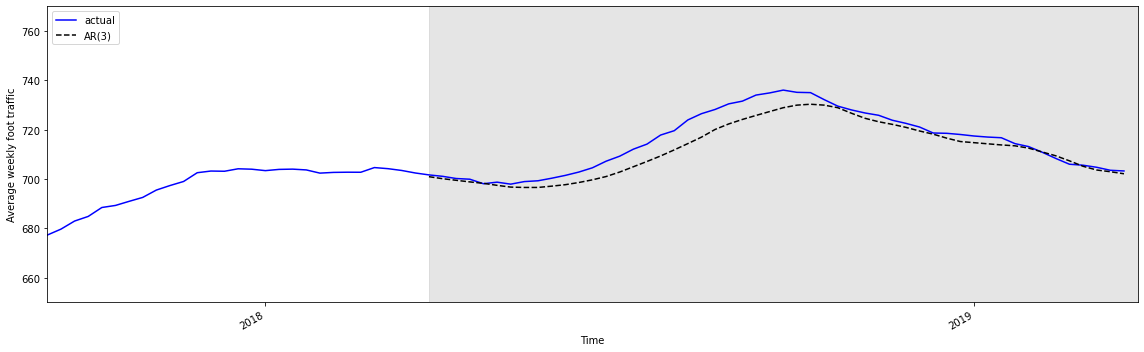

In [29]:
df['pred_foot_traffic']       = pd.Series()
df['pred_foot_traffic'][948:] = df['foot_traffic'].iloc[948] + pred_df['pred_AR'].cumsum()

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(df.foot_traffic, 'b-', label='actual')
ax.plot(df.pred_foot_traffic, 'k--', label='AR(3)') # Undifferenced predictions
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')
ax.axvspan(948, 1000, color='#808080', alpha=0.2)
ax.set_xlim(920, 1000)
ax.set_ylim(650, 770)
plt.xticks([936, 988],[2018, 2019])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [30]:
# Now, we can measure the MSE on the original dataset to get its meaning. Therefore, we simply measure the MSE again, only using the undifferenced predictions.
mse_AR_undiff = mean_squared_error(df.foot_traffic[948:], df.pred_foot_traffic[948:])
print(mse_AR_undiff)

20.438809657771603
